## Data and Setup

__Import numpy and pandas__

In [27]:
import numpy as np
import pandas as pd

__Import visualization libraries and set %matplotlib inline.__

In [28]:
import matplotlib.pyplot as plt

%matplotlib inline

__Read in csv file as a dataframe called df__

In [173]:
df = pd.read_csv('data/911.csv')

__Check the info() of the df__

In [174]:
df.info()

len(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


9

__Check the head of df__

In [160]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

__What are the top 5 zipcodes for 911 calls?__

In [161]:
df.zip.value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

__What are the top 5 townships (twp) for 911 calls?__

In [162]:
df.twp.value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

__Take a look at the 'title' column, how many unique title codes are there?__

In [163]:
df.title.value_counts().count()

110

## Creating new features

__In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" taht containts this string value.__

__For example, if the title column value is EMS: BACK PAINS/INJURY, the Reason column value would be EMS.__

In [175]:
#df.drop('Reason',axis=1)
df.insert( len(df.columns), 'Reason',df['title']  )
#df['Reason'].apply(lambda x: x[:x.index(':')]).value_counts()
df['Reason'] = pd.DataFrame(df['Reason'].apply(lambda x: x[:x.index(':')]))
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

__What is the most common Reason for a 911 call based off of this new column?__

In [165]:
df['Reason'][0]

'EMS'

__Now use seaborn to create a countplot of 911 calls by Reason.__

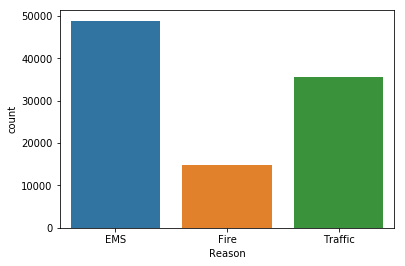

In [176]:
import seaborn as sns
import matplotlib.dates as mdates
from mpl_toolkits import mplot3d

from IPython.display import Image

dfReason = pd.DataFrame({'Reason':df['Reason'].to_numpy()},columns=['Reason'])
#dfReason
#sns.countplot("mfr", data=dfReason, hue="shelf")

ax = sns.countplot(x="Reason", data=dfReason)

__Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?__

In [167]:
type(df['timeStamp'][0]) # str

str

__You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.__

In [178]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
#df

In [179]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

__You can now grab specific attributes from a Datetime object by calling them. For example:__

    time = df['timeStamp'].iloc[0]
    time.hour
    
__You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.__

In [183]:
time = df['timeStamp'].iloc[0]
time.hour
time.month
time.dayofweek

df['Hour'] = df['timeStamp'].apply(lambda x:x.hour)
df['Month'] = df['timeStamp'].apply(lambda x:x.month)
df['Day Of Week'] = df['timeStamp'].apply(lambda x:x.dayofweek)

df

#df.insert( len(df.columns), 'Hour',0 )
# df.insert( len(df.columns), 'Month',0 )
# df.insert( len(df.columns), 'Day Of Week',0 )

#df

# def genCols(timestamp):
#     # generating extra 3 columns
#     #df.insert( len(df.columns), 'Hour',timestamp.iloc[0].hour  )
#     #df.insert( len(df.columns), 'Month',timestamp.month  )
#     #df.insert( len(df.columns), 'Day Of Week',timestamp.dayofweek  )
#     df['Hour'] = timestamp.iloc[0].hour
#     df['Month'] = 
#     df['Day Of Week'] = 
#     pass

#df['timeStamp'].apply(genCols)

#df['Day Of Week'] = pd.DataFrame({'Day Of Week':df['timeStamp'].iloc[0].dayofweek},columns=['Day Of Week'] )


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day Of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,3
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,17,12,3
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,17,12,3
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,17,12,3
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,17,12,3


In [184]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day Of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


__Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:__

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [185]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

#df['Day Of Week'] = df['timeStamp'].iloc[0].dayofweek

#df = df.drop('Day of Week',axis=1)
#df['Day Of Week'] = pd.DataFrame( {'Day Of Week':df['Day Of Week'].map(dmap)} ,columns=['Day Of Week'] )  

#

df.insert( len(df.columns), 'Day of Week',pd.DataFrame( {'Day Of Week':df['Day Of Week'].map(dmap)} ,columns=['Day Of Week'] ) )

In [186]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day Of Week,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,Thu
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,3,Thu
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,17,12,3,Thu
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,17,12,3,Thu
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,17,12,3,Thu
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,17,12,3,Thu


__Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.__

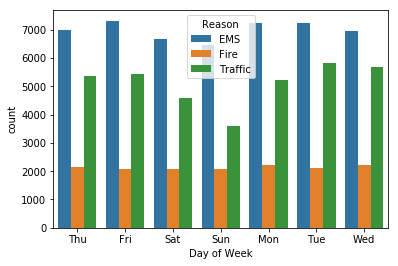

In [187]:
dfReason_ = pd.DataFrame({ 'Reason':df['Reason'].to_numpy(), 'Day of Week':df['Day of Week'].to_numpy() },columns=['Reason','Day of Week'])
dfReason_
#sns.countplot("mfr", data=dfReason, hue="shelf")

ax_ = sns.countplot(x="Day of Week", data=dfReason_, hue="Reason")

__Now do the same for Month:__

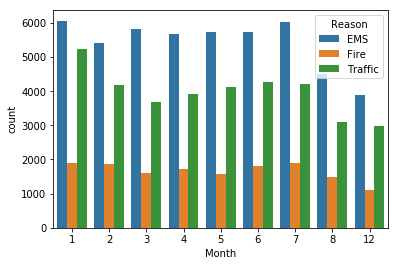

In [188]:
dfReason1 = pd.DataFrame({ 'Reason':df['Reason'].to_numpy(), 'Month':df['Month'].to_numpy() },columns=['Reason','Month'])
dfReason1
#sns.countplot("mfr", data=dfReason, hue="shelf")

ax_ = sns.countplot(x="Month", data=dfReason1, hue="Reason")

__Did you notice something strange about the Plot?__

__You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...__

__Now create a groupby object called by Month, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.__

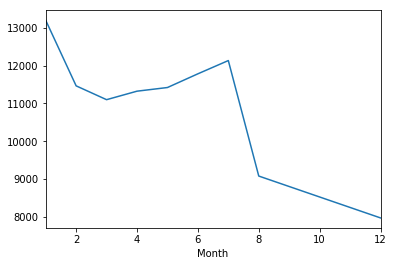

In [244]:
dfbyMonth = df.groupby("Month")

#dfbyMonth.count().describe().transpose()
#dfbyMonth.head()


#dfbyMonth.transpose()
#df

__Now create a simple plot off of the dataframe indicating the count of calls per month.__

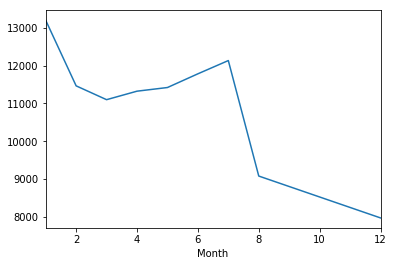

In [245]:

dfbyMonth.count()['lat'].plot()

In [254]:
dfbyMonth1 = dfbyMonth.count().reset_index()
dfbyMonth1

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day Of Week,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


__Now see if you can use seaborn's Implot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.__

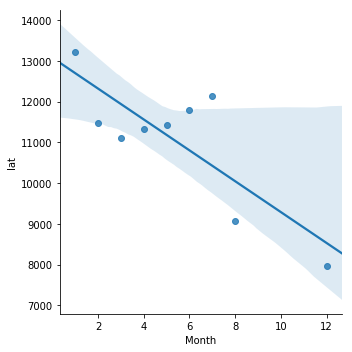

In [258]:

_ = sns.lmplot(x="Month",y="lat", data=dfbyMonth1  )

__Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.__

In [262]:
#df['timeStamp'][0].date()
df['Date'] = df['timeStamp'].apply( lambda x:x.date() )
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day Of Week,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,Thu,2015-12-10


__Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.__

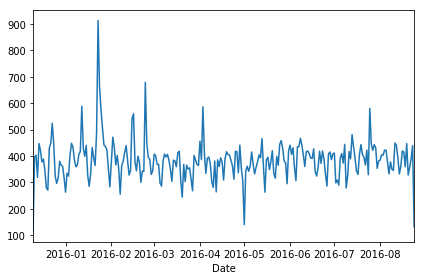

In [267]:
df.groupby("Date").count()['lat'].plot()
plt.tight_layout()


__Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call__


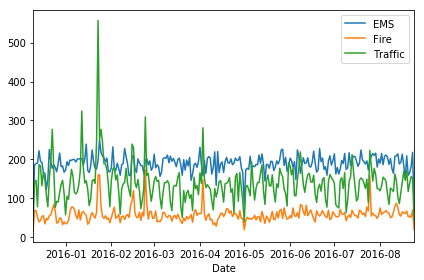

In [278]:
fig, ax = plt.subplots()
df[df["Reason"]=="EMS"].groupby("Date").count()['Reason'].plot(ax=ax)
df[df["Reason"]=="Fire"].groupby("Date").count()['Reason'].plot(ax=ax)
df[df["Reason"]=="Traffic"].groupby("Date").count()['Reason'].plot(ax=ax)
plt.tight_layout()
plt.legend(['EMS','Fire','Traffic'])


__Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!__

In [296]:
dfHeat = df.groupby(['Day of Week','Hour'])
dfHeat = dfHeat.count()['Reason'].unstack()

__Now create a HeatMap using this new DataFrame.__

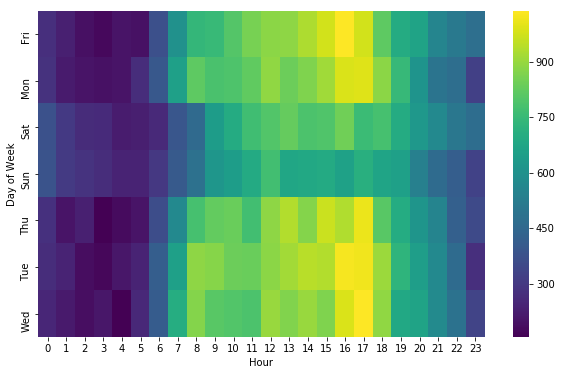

In [301]:
plt.figure(figsize=(10,6))
_ = sns.heatmap(dfHeat, cmap="viridis")

__Now create a clustermap using this DataFrame.__

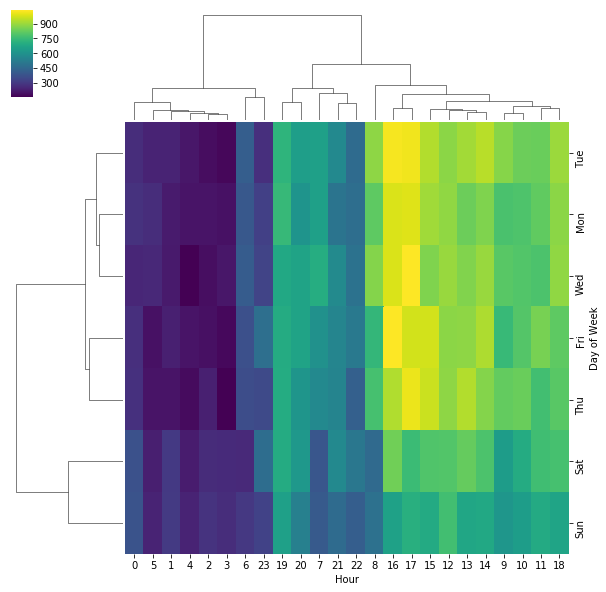

In [303]:
_ = sns.clustermap( dfHeat, cmap='viridis' )

__Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.__

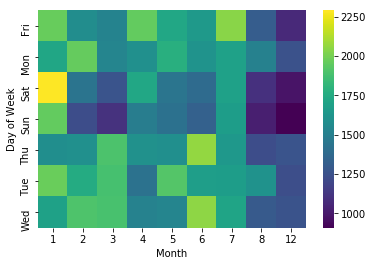

In [305]:
dfHeat = df.groupby(['Day of Week','Month'])
dfHeat = dfHeat.count()['Reason'].unstack()
_ = sns.heatmap(dfHeat, cmap="viridis")

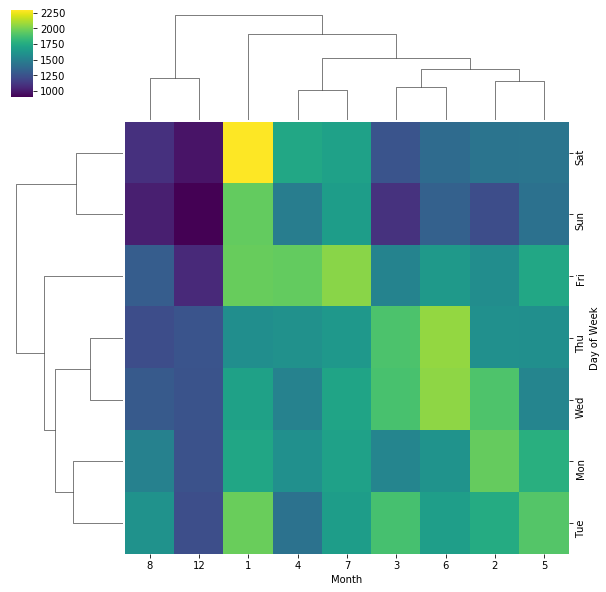

In [306]:
_ = sns.clustermap( dfHeat, cmap='viridis' )